In [27]:
#Integrantes
#Raymundo Diaz Vega
#Pablo Andres Arrieta Lara
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [28]:
class K:#Implementacion del algoritmo K means
    def __init__(self, k = 2, m = 500, t = 0.0001):
        self.k = k
        self.m = m#Numero de iteraciones
        self.t = t#Tolerancia

    def Means(self, datos):
        self.u = {}#Crentroides del conjunto de datos

        for i in range(self.k): self.u[i] = datos[i]#Inicializamos los centroides con los primeros elementos del conjunto de datos

        for i in range(self.m):#Repetimos m veces para hayar los centroides con menor costo
            self.clases = {}#Clasificamos los centroides por sus caracteristicas
            for i in range(self.k): self.clases[i] = []#Creamos las listas para los puntos que iremos agregando

            for punto in datos:
                distancias = [np.sqrt(np.sum((punto - self.u[centroide])**2)) for centroide in self.u]#Calculamos la distancia euclidiana de un punto a cada centroide
                cluster = distancias.index(min(distancias))#Escogemos la distancia minima a uno de los centroides
                self.clases[cluster].append(punto)#Agregamos el punto al cluster

            k_anteriores = self.u#Guargamos los valores de los centroides de la iteracion anterior

            for cluster in self.clases: self.u[cluster] = np.average(self.clases[cluster], axis = 0)#Calculamos el promedio para los puntos obtenidos en cada cluster

            optimo = True

            for centroide in self.u:
                anterior, actual = k_anteriores[centroide], self.u[centroide]
                if np.sum((actual - anterior)/anterior * 100.0) > self.t: optimo = False#Si el valor de los centroides es mayor que nuestra tolerancia, hacemos optimo = False
                if optimo: break


In [29]:
class clustering:

    def __init__(self,archivo, k, m , t):
        self.Xs = np.loadtxt(archivo, delimiter=";")
        self.k = k
        self.m = m
        self.K = K(self.k, self.m)
        self.colores = ["r", "b"]

    def datos(self):
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.title('Conjunto de datos')
        for punto in self.Xs: plt.scatter(punto[0], punto[1], color="g")
        plt.show()

    def Kmeans(self):
        self.K.Means(self.Xs)
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.title('K-Means')
        for cluster in self.K.clases:
            color = self.colores[cluster]
            for punto in self.K.clases[cluster]: plt.scatter(punto[0], punto[1], color = color, s = 30)

        for centroide in self.K.u: plt.scatter(self.K.u[centroide][0], self.K.u[centroide][1], s = 140, marker = "x")
        plt.show()

    def Elbow(self):#Metodo del codo
        x, y = [], []
        for i in range(1,11):
            kmeans = KMeans(n_clusters=i, random_state=0).fit(self.Xs)
            x.append(i)
            y.append(kmeans.inertia_)
        plt.xlabel('Numero de clusters')
        plt.ylabel('Puntuacion')
        plt.title('Elbow Curve')
        plt.plot(x, y, 'o-', label="Inercia vs # Clusters")
        plt.legend(loc=1)
        plt.show()

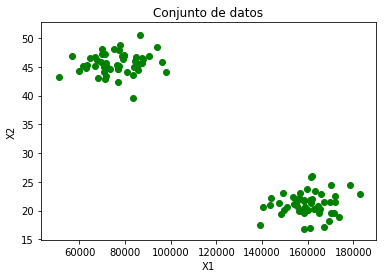

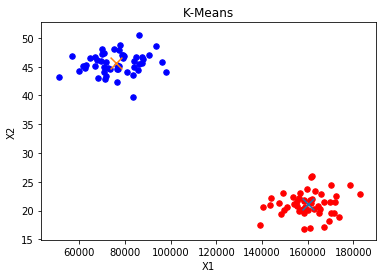

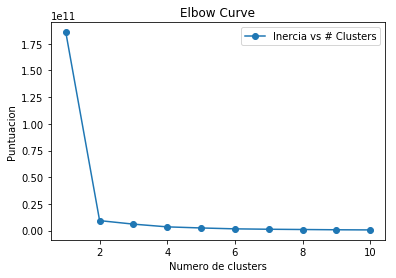

In [30]:
if __name__ == "__main__":
    Clustering = clustering("cluster_k2.txt", 2, 500, 0.0001)
    Clustering.datos()
    Clustering.Kmeans()
    Clustering.Elbow()